# 1. Analyze the relationship between cholesterol levels and heart attack risk, considering additional factors such as BMI, blood pressure, triglyceride levels, and lifestyle habits. What patterns indicate a stronger correlation?

Data: https://drive.google.com/file/d/13ShLPdVJdjiCsyIuif4Ih45ZUA9Zu8Zz/view?usp=sharing

## Step 1: Load the dataset

In [93]:

# Define the file path
file_path = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\Heart_Attack_Male.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East_M,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,27,Male,East_M,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
2,20,Male,West_M,Rural,Middle,Never,Never,Non-Vegetarian,High,2,...,High,171.5/107.1,115,Normal,Atypical,142,No,93.0,129,No
3,29,Male,East_M,Rural,High,Regularly,Never,Non-Vegetarian,Moderate,8,...,Low,176.7/110.0,118,Normal,Non-anginal,181,No,93.4,444,No
4,35,Male,West_M,Urban,High,Occasionally,Never,Non-Vegetarian,Sedentary,12,...,High,140.5/106.1,110,Normal,Asymptomatic,141,No,97.1,297,No


## Step 2: Select relevant columns for analysis

In [94]:

# Define the required columns for analysis
selected_columns = [
    'Smoking Status', 'Alcohol Consumption', 'Diet Type', 
    'Physical Activity Level', 'Screen Time (hrs/day)', 
    'Sleep Duration (hrs/day)', 'Stress Level', 
    'BMI (kg/m²)', 'Blood Pressure (systolic/diastolic mmHg)', 
    'Triglyceride Levels (mg/dL)', 'Cholesterol Levels (mg/dL)', 
    'Heart Attack Likelihood'
]

# Create a new DataFrame containing only the selected columns
df_analysis = df[selected_columns].copy()

# Display the first few rows of the new DataFrame
df_analysis.head()

,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Stress Level,BMI (kg/m²),Blood Pressure (systolic/diastolic mmHg),Triglyceride Levels (mg/dL),Cholesterol Levels (mg/dL),Heart Attack Likelihood
0,Never,Regularly,Non-Vegetarian,Sedentary,3,8,High,34.4,177.0/63.1,58,148,No
1,Occasionally,Never,Vegetarian,Sedentary,6,7,Medium,19.0,177.1/90.0,102,137,Yes
2,Never,Never,Non-Vegetarian,High,2,5,High,15.5,171.5/107.1,129,205,No
3,Regularly,Never,Non-Vegetarian,Moderate,8,10,Low,21.4,176.7/110.0,444,278,No
4,Occasionally,Never,Non-Vegetarian,Sedentary,12,9,High,30.7,140.5/106.1,297,268,No


## Step 3: Identify ordinal columns and their unique values

In [95]:

# Define ordinal columns
ordinal_columns = [
    'Smoking Status', 'Alcohol Consumption', 'Diet Type',
    'Physical Activity Level', 'Stress Level', 'Heart Attack Likelihood'
]

# Print unique values for each ordinal column
for col in ordinal_columns:
    print(f"Unique values in '{col}': {df_analysis[col].unique()}\n")

Unique values in 'Smoking Status': ['Never' 'Occasionally' 'Regularly']

Unique values in 'Alcohol Consumption': ['Regularly' 'Never' 'Occasionally']

Unique values in 'Diet Type': ['Non-Vegetarian' 'Vegetarian' 'Vegan']

Unique values in 'Physical Activity Level': ['Sedentary' 'High' 'Moderate']

Unique values in 'Stress Level': ['High' 'Medium' 'Low']

Unique values in 'Heart Attack Likelihood': ['No' 'Yes']



## Step 4: Encode ordinal categorical variables

In [97]:
# Define ordinal mappings
ordinal_mappings = {
    'Smoking Status': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Alcohol Consumption': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Diet Type': {'Vegan': 0, 'Vegetarian': 1, 'Non-Vegetarian': 2},
    'Physical Activity Level': {'Sedentary': 0, 'Moderate': 1, 'High': 2},
    'Stress Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Heart Attack Likelihood': {'No': 0, 'Yes': 1}  # Binary categorical
}

# Apply the mapping to convert categorical variables into numerical values
df_analysis.replace(ordinal_mappings, inplace=True)

## Step 5: Split Blood Pressure into Systolic and Diastolic

In [98]:
# Ensure the column is a string before splitting
df_analysis[['Systolic_BP', 'Diastolic_BP']] = df_analysis['Blood Pressure (systolic/diastolic mmHg)']\
    .astype(str).str.split('/', expand=True).astype(float)

# Drop the original Blood Pressure column (optional)
df_analysis.drop(columns=['Blood Pressure (systolic/diastolic mmHg)'], inplace=True)

# Display the updated DataFrame
df_analysis.head()

,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Stress Level,BMI (kg/m²),Triglyceride Levels (mg/dL),Cholesterol Levels (mg/dL),Heart Attack Likelihood,Systolic_BP,Diastolic_BP
0,0,2,2,0,3,8,2,34.4,58,148,0,177.0,63.1
1,1,0,1,0,6,7,1,19.0,102,137,1,177.1,90.0
2,0,0,2,2,2,5,2,15.5,129,205,0,171.5,107.1
3,2,0,2,1,8,10,0,21.4,444,278,0,176.7,110.0
4,1,0,2,0,12,9,2,30.7,297,268,0,140.5,106.1


## Step 6: Compute correlation with Heart Attack Likelihood

In [99]:

# Use Spearman correlation to account for ordinal variables
heart_corr = df_analysis.corr(method='spearman')['Heart Attack Likelihood'].sort_values(ascending=False)

# Display results
print("Correlation with Heart Attack Likelihood (Sorted):")
print(heart_corr)

Correlation with Heart Attack Likelihood (Sorted):
Heart Attack Likelihood        1.000000
Stress Level                   0.014651
Cholesterol Levels (mg/dL)     0.007090
Diastolic_BP                   0.006630
BMI (kg/m²)                    0.006534
Diet Type                      0.004607
Triglyceride Levels (mg/dL)    0.004346
Systolic_BP                    0.002740
Alcohol Consumption           -0.001595
Smoking Status                -0.004950
Physical Activity Level       -0.006308
Sleep Duration (hrs/day)      -0.011794
Screen Time (hrs/day)         -0.015396
Name: Heart Attack Likelihood, dtype: float64


## Step 7: Compute correlation with Cholesterol Levels

In [100]:
# Use Spearman correlation to examine relationships with cholesterol levels
chol_corr = df_analysis.corr(method='spearman')['Cholesterol Levels (mg/dL)'].sort_values(ascending=False)

# Display results
print("Correlation with Cholesterol Levels (Sorted):")
print(chol_corr)

Correlation with Cholesterol Levels (Sorted):
Cholesterol Levels (mg/dL)     1.000000
Triglyceride Levels (mg/dL)    0.038856
Screen Time (hrs/day)          0.027900
Sleep Duration (hrs/day)       0.020477
Physical Activity Level        0.012655
Stress Level                   0.009382
Heart Attack Likelihood        0.007090
Systolic_BP                    0.001911
Diet Type                     -0.001923
Smoking Status                -0.004079
Diastolic_BP                  -0.004163
BMI (kg/m²)                   -0.005066
Alcohol Consumption           -0.005198
Name: Cholesterol Levels (mg/dL), dtype: float64


## Query 1 Answer:
 ✅ **Stress Level and Heart Attack Likelihood have a correlation of 0.0146**, showing a very weak connection.

✅ **Triglyceride Levels and Cholesterol Levels have a correlation of 0.0389**, suggesting a slight relationship

✅ **Screen Time and Cholesterol Levels have a correlation of 0.0279**, indicating a weak li  

✅ **Diastolic Blood Pressure and Heart Attack Likelihood have a correlation of 0.0066**, which is a very weak connec.  

🔹 Overall, the correlations are weak, meaning no strong relationship exists between cholesterol, heart attack risk, and other factors in this dataset.


# 2. Visualize how profit is distributed across different categories using a pie chart, and explode the wedge with the highest percentage of profit across all categories.

Data: https://drive.google.com/file/d/1-cCEA9WxaLbjx8MwQJUfrQOfznnE_r5k/view?usp=sharing

In [ ]:
# "C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\Superstore (1).csv"

## Load the dataset

In [101]:
# Import necessary libraries  
import pandas as pd
import matplotlib.pyplot as plt  

# Load the dataset  
file_path_2 = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\Superstore (1).csv"
df_2 = pd.read_csv(file_path_2)

# Display first five rows  
df_2.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## STEP 1: Group Profit by Category

In [102]:
profit_by_category = df_2.groupby("Category")["Profit"].sum()  # Aggregates total profit per category  
print(profit_by_category)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145451.9773
Name: Profit, dtype: float64


## STEP 2: Prepare Data for Pie Chart 

In [123]:
 
labels = profit_by_category.index  # Extract category names  
sizes = profit_by_category.values  # Extract corresponding profit values  
explode = [0] * len(labels)  # Initialize list of the label as zero where len() of the label help populate it   
shadow={'ox': -0.03, 'edgecolor': 'none', 'shade': 0.6}

# Identify the category, size and the highest profit  
max_index = sizes.argmax()  # Integer position (e.g., 2)
max_category = labels[max_index]  # Name (e.g., 'Furniture')
max_value = sizes[max_index]  # Value (e.g., 75000)

# Identify the category with the highest profit  
max_index = sizes.argmax()  # Finds index of maximum profit  
explode[max_index] = 0.1  # Offset the wedge with the highest profit  
 
print(f"Maximum Index Position: {max_index}")
print(f"Maximum Category: {max_category}")
print(f"Maximum Value: ${max_value:,.0f}")

Maximum Index Position: 2
Maximum Category: Technology
Maximum Value: $145,452


## STEP 3: Create Pie Chart following (API Structure) for Query 2 Answer:

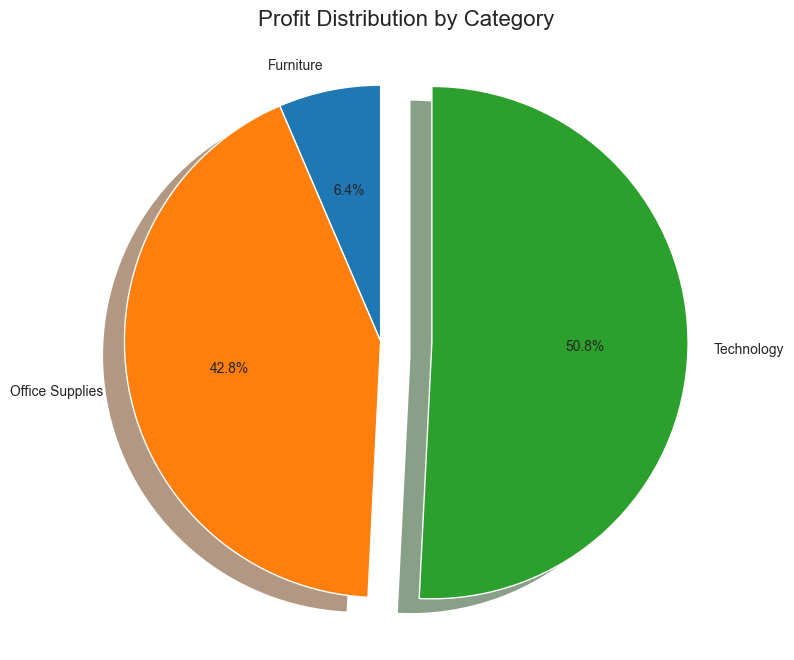

In [124]:

plt.figure(figsize=(8, 8))  # Set figure size  

plt.pie(
    sizes,                      # List of values representing the wedges' sizes  
    labels=labels,              # Labels corresponding to each category  
    explode=explode,            # Determines which slice to offset (highlight)  
    autopct='%1.1f%%',          # Displays percentage values inside slices  
    shadow=shadow,              # Adds a shadow effect  
    startangle=90,              # Rotates the first slice to 90°  
    radius = 0.5                # Controlling the size
)

plt.title('Profit Distribution by Category', fontsize=16) 
plt.axis('equal')  # Ensures the pie chart remains circular  
plt.show() 


Query 2 Answer:

# 3. Visualize the global sales trends of Nintendo games over time using a line plot. How have Nintendo's sales figures evolved from the 1980s to the 2000s?

Data: https://drive.google.com/file/d/1IwbdhYcqMEf4zZH0Hfgbev9pCrpvJiGk/view?usp=sharing

In [ ]:
# "C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\vgsales_no_headers.csv"

## STEP 1: Define Column Headers and load the data

In [158]:
 
headers = [
    'Rank',          # Rank of the video game  
    'Name',          # Name of the video game  
    'Platform',      # Gaming platform  
    'Year',          # Release year  
    'Genre',         # Type of game (e.g., sport, Rasing)  
    'Publisher',     # Company that published the game  
    'NA_Sales',      # Sales in North America (millions)  
    'EU_Sales',      # Sales in Europe (millions)  
    'JP_Sales',      # Sales in Japan (millions)  
    'Other_Sales',   # Sales in other regions (millions)  
    'Global_Sales'   # Total worldwide sales (millions)  
]

file_path_3 = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\vgsales_no_headers.csv"
df_3 = pd.read_csv(file_path_3, header=None, names=headers)  

df_3['Year'].fillna(0, inplace=True)  # Replace NaNs (if any) with 0
df_3['Year'] = df_3['Year'].astype(int)  # Convert to integer

print(df_3.head())  

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## STEP 2: Filter Data for Nintendo Games  

In [159]:

nintendo_games = df_3[df_3['Publisher'] == 'Nintendo']  #Filters the dataset to include only games published by Nintendo 
  
yearly_sales = nintendo_games.groupby('Year')['Global_Sales'].sum().reset_index()  # nintendo_games Group by Year and Sum Global Sales 

print((yearly_sales).head(3))

   Year  Global_Sales
0     0          2.13
1  1983         10.96
2  1984         45.56


## STEP 3: Set Plot Styling and Create Line Plot 

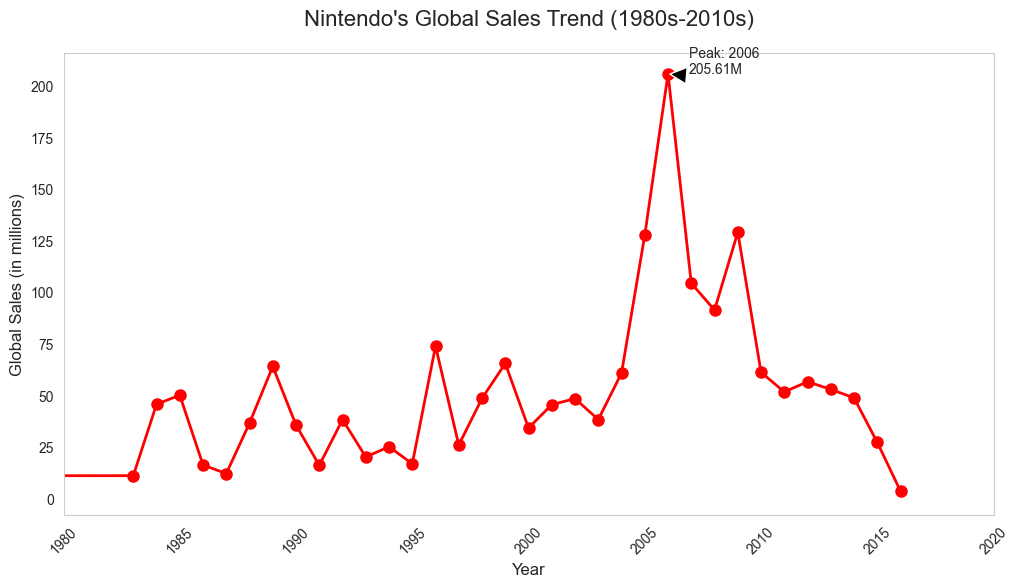

In [176]:
 
plt.figure(figsize=(12, 6))  # Set figure size  

plt.plot(
    yearly_sales['Year'],      # X-axis: Year  
    yearly_sales['Global_Sales'],  # Y-axis: Total Global Sales  
    marker='o',        # Circular markers at data points  
    linewidth=2,       # Line thickness  
    color='red',       # Line color  
    markersize=8       # Marker size  
)
 
plt.title("Nintendo's Global Sales Trend (1980s-2010s)", fontsize=16, pad=20)  # Add title  
plt.xlabel('Year', fontsize=12)  # X-axis label  
plt.ylabel('Global Sales (in millions)', fontsize=12)  # Y-axis label  
plt.xticks(rotation=45)  # Rotate x-axis labels  
plt.xlim(1980, 2020)  # Focus on relevant time period  
 
# Annotate the Peak Sales Year   

peak_year = yearly_sales.loc[yearly_sales['Global_Sales'].idxmax()]
lowest_year = yearly_sales.loc[yearly_sales['Global_Sales'].idxmin()]

# `.idxmax()`: Finds the index of the max global sales and a reverse case with the 'idxmin()' 
# `yearly_sales.loc[]`: Selects the row of the peak sales year and also to select that for the lowest

plt.annotate(
    f"Peak: {int(peak_year['Year'])}\n{peak_year['Global_Sales']:.2f}M",  # Annotation text  
    xy=(peak_year['Year'], peak_year['Global_Sales']),  # Data point to annotate  
    xytext=(15, 0.8), textcoords='offset points',  # Offset text position  
    arrowprops=dict(facecolor='black', shrink=0.09)  # Arrow pointing to peak sales  
)


plt.grid(False)  # Turns off the grid lines
plt.show()


### Query 3 Answer: How have Nintendo's sales figures evolved from the 1980s to the 2000s?


From the **1980s to the early 2000s**, Nintendo’s global sales showed **fluctuations**, with multiple peaks occurring around **50 million to 70 million** in total salas.  

However, in **2006**, Nintendo experienced an **unprecedented sales boom**, reaching its highest recorded peak of **205.61 million uniii**.  

Following this peak, sales saw a **significant decline**, with a steady drop continuing through **rmance.  


# 4. In Saudi Arabia, the 5-day workweek starts on Sunday. Analyze the impact of the weekend and weekday quote dates on the quote price.

Data: https://drive.google.com/file/d/1vROMYOn9OUrIS7ChIIzkGpjeEdxm5Pe1/view?usp=sharing

In [ ]:
# "C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\luxury_goods_selling_transaction - quote_sell_dataset - luxury_goods_selling_transaction - quote_sell_dataset.csv"

## STEP 1: load the data

In [177]:

import pandas as pd
from datetime import datetime

# Load dataset
file_path_4 = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Task 2\luxury_goods_selling_transaction - quote_sell_dataset - luxury_goods_selling_transaction - quote_sell_dataset.csv"
df_4 = pd.read_csv(file_path_4)

# Display first few rows
print(df_4.head())

   Quote ID                             Product Name  Purchased Year  \
0   2842302      ALEXANDER WANG Rhinestone Mesh Mini            2019   
1   2455752  BALENCIAGA Agneau Classic Hardware City            2014   
2   2455734     BALENCIAGA Chevre Gold Metallic Edge            2013   
3     18640               Baobao Issey Miyake clutch            2020   
4     18957                 Burberry Nova check tote            2016   

     Luxury Brand Selling Platform  Quote Date  Quote Price  Sold Price  \
0  Alexander Wang     Fashionphile  2022-11-03        300.0       300.0   
1      Balenciaga     Fashionphile  2022-04-27        450.0       450.0   
2      Balenciaga     Fashionphile  2022-04-26        950.0       950.0   
3          Baobao       CoutureUSA  2022-11-16        142.5         0.0   
4        Burberry       CoutureUSA  2022-12-05        290.0         0.0   

  Category  Condition           Status Payment Method  
0  handbag  Pre-owned        Completed            ACH  
1  h

## Step 2: Convert, Extract, Classify 'Quote Date' to their required format

In [192]:
# Convert 'Quote Date' to datetime format
df_4['Quote Date'] = pd.to_datetime(df_4['Quote Date'])

# Adjust day of the week to start from Sunday (Saudi workweek) normal structure(Sunday = 0, Monday = 1, ..., Saturday = 6)
df_4['Day of Week'] = (df_4['Quote Date'].dt.dayofweek + 1) % 7  # Shift so Sunday=0

# Extract day name from the 'Quote Date' column
df_4['Day Name'] = df_4['Quote Date'].dt.day_name()

# Classify weekdays and weekends based on the Saudi workweek
df_4['Week Type'] = df_4['Day of Week'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'  # i.e Friday (5) & Saturday (6) = Weekend
)
print(df_4[['Day of Week', 'Day Name', 'Week Type']].head(25))


    Day of Week   Day Name Week Type
0             4   Thursday   Weekday
1             3  Wednesday   Weekday
2             2    Tuesday   Weekday
3             3  Wednesday   Weekday
4             1     Monday   Weekday
5             1     Monday   Weekday
6             3  Wednesday   Weekday
7             6   Saturday   Weekend
8             3  Wednesday   Weekday
9             2    Tuesday   Weekday
10            2    Tuesday   Weekday
11            3  Wednesday   Weekday
12            3  Wednesday   Weekday
13            3  Wednesday   Weekday
14            3  Wednesday   Weekday
15            2    Tuesday   Weekday
16            1     Monday   Weekday
17            6   Saturday   Weekend
18            2    Tuesday   Weekday
19            2    Tuesday   Weekday
20            2    Tuesday   Weekday
21            2    Tuesday   Weekday
22            1     Monday   Weekday
23            5     Friday   Weekend
24            4   Thursday   Weekday


###  Analysis by Week Type 

In [194]:

price_stats = df_4.groupby('Week Type')['Quote Price'].agg(['mean', 'median', 'std', 'count'])

# summary statistics for weekdays vs. weekends
print("Price Statistics by Week Type:")
print(price_stats)

Price Statistics by Week Type:
                 mean  median          std  count
Week Type                                        
Weekday    841.973214  440.00  1150.833723     56
Weekend    842.900000  549.75  1043.316901     10


### Day-by-Day Analysis 

In [195]:
# Define the correct order for days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Compute daily statistics and reorder days
daily_stats = df_4.groupby('Day Name')['Quote Price'].agg(['mean', 'median', 'count']).reindex(day_order)

# Print daily quote price statistics
print("\nDaily Price Statistics:")
print(daily_stats)


Daily Price Statistics:
                  mean  median  count
Day Name                             
Sunday             NaN     NaN    NaN
Monday     1021.735294  420.00   17.0
Tuesday     879.444444  445.00   18.0
Wednesday   713.400000  450.00   15.0
Thursday    541.666667  300.00    6.0
Friday     1210.000000  705.00    6.0
Saturday    292.250000  267.25    4.0


In [198]:
# Count occurrences of Sunday in the dataset
sunday_count = (df_4['Day Name'] == 'Sunday').sum()

# Print the count
print(f"Number of transactions recorded on Sunday: {sunday_count}")


Number of transactions recorded on Sunday: 0


## Query 4 Answer: ** Impact of Weekday and Weekend on Quote Prices **

### **1. Weekday vs. Weekend Price Impact**
- *The *Mean quote prices are nearly identical** on weekdays £841.97) and weekends £842.90), suggesting **no significant pricing difference**.
- **Fewer transactions occur on weekends (10) compared to weekdays (56)**, indicating lower market activity.

### **2. Daily Breakdown Analysis**
- **Friday records the highest mean prce (£1,210.00)** and a median of (£705.00), suggesting **high-value quotes before the weekend**.
- **Saturday has the lowest mean pice (£292.25) and the fewest transactions (4)**, indicating **a drop in market activity**.
- **Monday sees the highest number of transactions (17)**, implying **strong engagement at the start of the workweekend.
- **Sunday has no recorded transactions**, meaning it **may not be an active trading day** for quotes.